# No, the Film Industry Isn't Dying: How Hit Movies Have Changed Over Time

You might've heard the sentiment that the film industry is dying, or even that it's over completely. And everyone has a different take: maybe it's being brought on by the advent of streaming, or maybe its 'formulaic' superhero genre taking the world by storm. 

Even Martin Scorsese, the iconic director famous for movies like *Taxi Driver* and *The Wolf of Wall Street*, was quoted during 2017 saying, "*Cinema is gone...The cinema I grew up with and that I’m making, it’s gone.”* But is it truly gone? Or just changed and transformed? What can we learn from looking at trends over the past several decades of successful movies? What has evolved and what has stayed the same?

*A little bit about my dataset:* I found this dataset on [Kaggle.](https://www.kaggle.com/datasets/danielgrijalvas/movies?resource=download) It was scraped from IMDb using python and has the ~200 most popular movies per year from the years 1980 to 2020. It's important to note that the "gross" column is only accounting for US grossing numbers, so that's the scope I'll be looking at here. It's also important to note that 'score' and 'votes' are specific to IMDb, and not accounting for all data that's out there. However, IMDb is an incredibly popular site for film and television, so I think it's fair to assume that it's mostly representative of the American population, but it isn't 100%

*About my process:* It's been a suprisingly frustrating journey to get to the point I currently am at in the project. I started with different datasets (4 actually) about diversity, tuition, and pay. I sunk a lot of time into trying to effectively clean, merge, and visualize the data. The things I thought would correlate did not and I was just becoming increasingly confused and overwhelmed. I tried to make it work a little bit longer, but really my heart just wasn't it. So I thought about what really, truly interests me- and that's movies! After some more searching, I found this dataset. I find the way things change over time to be really fascinating, especially when talking about data visualizations, so I decided this was more aligned with the story I want to tell. 

However, because of my late switch and the big time suck of my original idea, I'm not quite at where I want to be with my visualizations. I have lots of working ideas below, but really want to clean them up/use seaborn as I continue to work. You also might notice I have a lot of writing and code commenting already incorporated throughout, as it really helps me to narrate what I'm doing as I go. There's some I might keep, and a lot I'm planning to discard.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

%matplotlib inline

In [2]:
# reading in my dataset
df = pd.read_csv('movies.csv')

# budget had a lot of null data so I just removed it entirely
df = df.drop(columns=['budget'])

In [3]:
# get a look at a sample!
df.sample()

,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime
7481,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,1.050694e+09,Walt Disney Pictures,128.0


In [4]:
# what genres are there
print(df['genre'].unique())

['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Family' 'Sci-Fi' 'Animation' 'Romance' 'Music' 'Western'
 'Thriller' 'History' 'Mystery' 'Sport' 'Musical']


In [5]:
# what are the possible ratings
print(df['rating'].unique())

['R' 'PG' 'G' nan 'Not Rated' 'NC-17' 'Approved' 'TV-PG' 'PG-13' 'Unrated'
 'X' 'TV-MA' 'TV-14']


*Factors I'm planning to look at:* I want to look at runtime, country (more particularly United States vs non-United States hit movies), genre, and rating. Gross numbers are interesting as well, but a lot of data that's also not adjusted for inflation. There are simply too many directors, writers, and stars to look at those factors within the scope of this project

In [9]:
# group by 'year' column and calculate the mean 
result = df.groupby('year').mean()['runtime']

# add the result as a new column to the original DataFrame
df['average_runtime'] = df['year'].map(result)

<AxesSubplot:xlabel='year'>

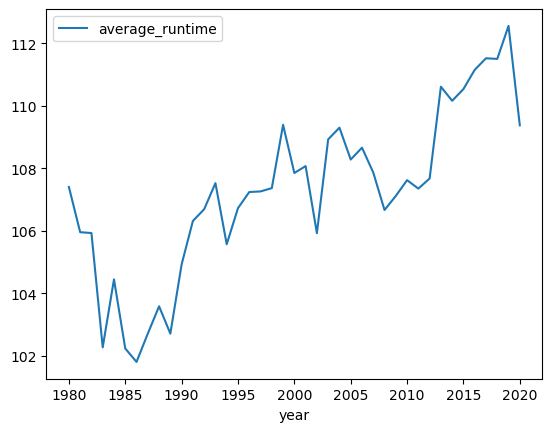

In [10]:
df.plot(x='year',y='average_runtime')

I averaged together the runtimes of the 220 movies from each year to create an 'average_runtime' column. As you can see, there's a 6 minute decline from 1980 to 1990. Upon further research, it's believed this could be due to studios shortening their movies to under 2 hours to fit on one VHS tape. From there, we see an increase in average movie time of over 10 minutes from 1996 to 2019. So if you've ever heard someone say they feel like movies are getting longer, they're correct (although gradually)

I also thought it might be cool to see the data above, but displayed with a 25th percentile, median, and 75th percentile element. That's what's below

In [11]:
result = df.groupby('year').runtime.agg(['quantile', lambda x: x.quantile(0.25),
                                        lambda x: x.quantile(0.5),
                                        lambda x: x.quantile(0.75)])
result = result.reset_index()
result.columns = ['year', 'quantile', '25th_Percentile', 'Median', '75th_Percentile']

df = df.merge(result, on='year', how='left')

<AxesSubplot:xlabel='year'>

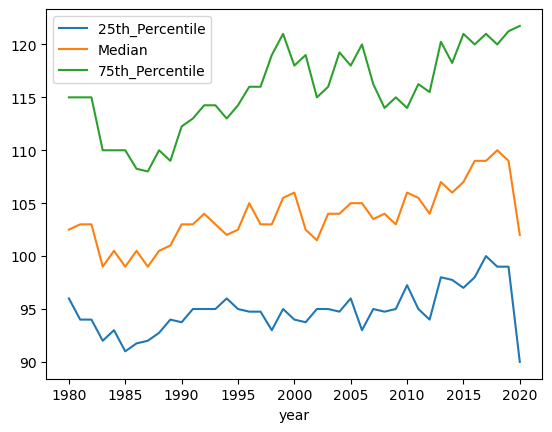

In [12]:
df.plot(x="year", y=["25th_Percentile", "Median", "75th_Percentile"])

I'm not sure if this is a more confusing figure, or a more helpful one. I like that you're able to see that the biggest drop in 1986 is actually in the 75th percentile, emphasizing the possibility that they were trying to keep most movies under 2 hrs. I also think it's interesting you see this really steep drop off in the 25th percentile and median in 2020, and I would assume the pandemic played a role in that, but movies that were less impacted by the pandemic stayed at the standard runtime

In [35]:
movies_per_year = df.groupby('year').size().reset_index(name='count')

In [13]:
print(df['year'].unique())
df_2018 = df[df['year'] == 2018]

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


Text(0.5, 1.0, 'Most popular genres of movies in 2018')

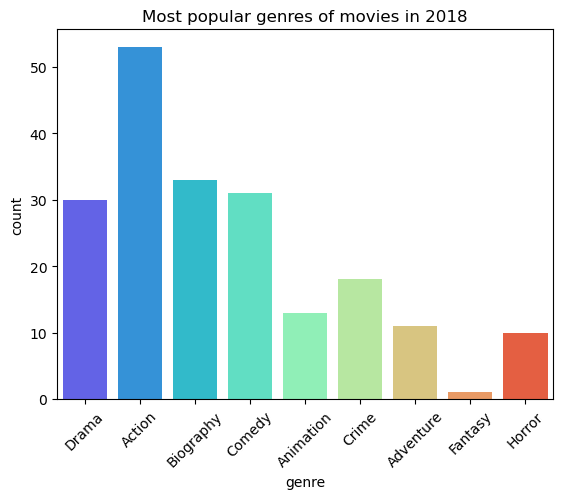

In [14]:
sb.countplot(x='genre',data=df_2018, palette='rainbow')
plt.xticks(rotation=45)
plt.title("Most popular genres of movies in 2018")

Text(0.5, 1.0, 'Most popular genres of movies in 2008')

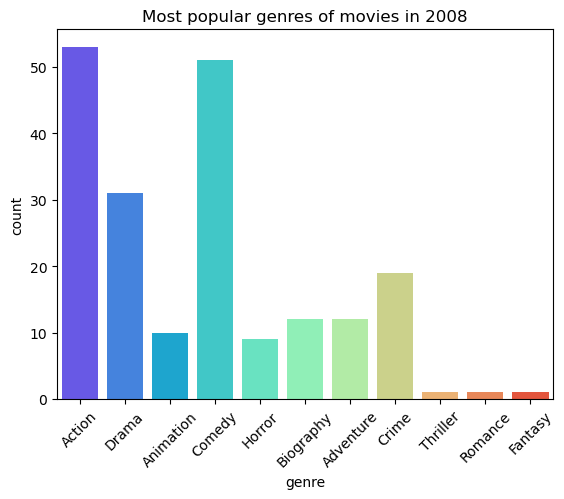

In [31]:
df_2008 = df[df['year'] == 2008]
sb.countplot(x='genre',data=df_2008, palette='rainbow')
plt.xticks(rotation=45)
plt.title("Most popular genres of movies")
plt.title("Most popular genres of movies in 2008")

Text(0.5, 1.0, 'Most popular genres of movies in 1998')

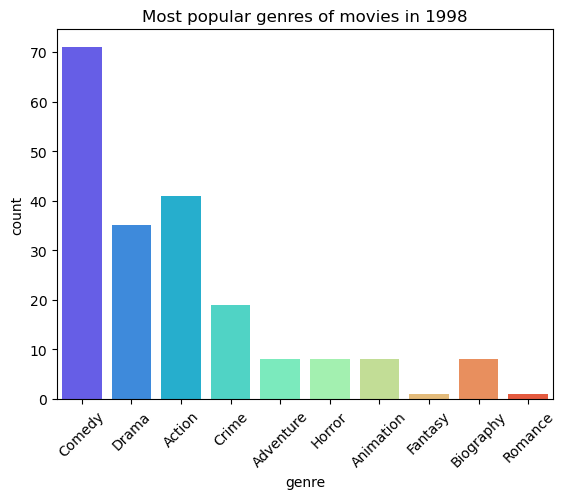

In [15]:
df_1998 = df[df['year'] == 1998]
sb.countplot(x='genre',data=df_1998, palette='rainbow')
plt.xticks(rotation=45)
plt.title("Most popular genres of movies")
plt.title("Most popular genres of movies in 1998")

Text(0.5, 1.0, 'Most popular genres of movies in 1988')

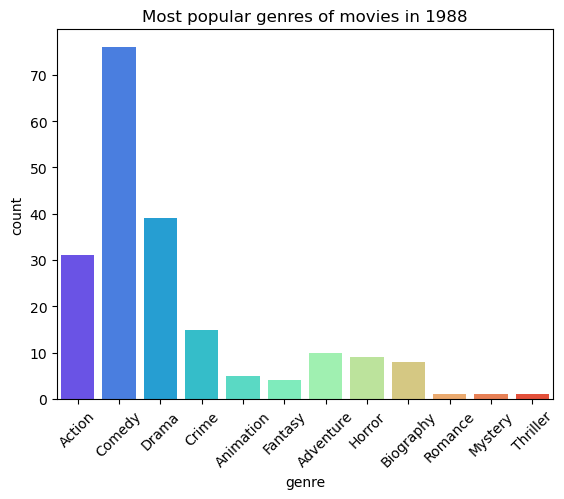

In [16]:
df_1988 = df[df['year'] == 1988]
sb.countplot(x='genre',data=df_1988, palette='rainbow')
plt.xticks(rotation=45)
plt.title("Most popular genres of movies in 1988")

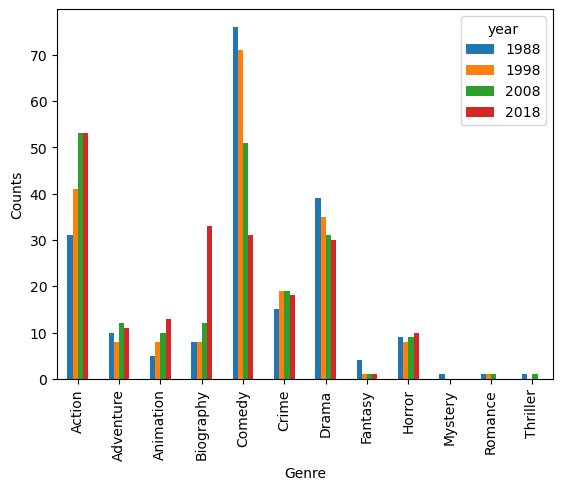

In [17]:
df_mat = df[df['year'].isin([1988, 1998, 2008, 2018])]

# Group the dataframe by year and genre and count the number of each genre in each year
grouped = df_mat.groupby(['year', 'genre']).size().reset_index(name='counts')

# Use pivot to make the dataframe in a format suitable for plotting
pivot = grouped.pivot(index='year', columns='genre', values='counts')

# Plot the data
pivot = pivot.T
pivot.plot(kind='bar', stacked=False)
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

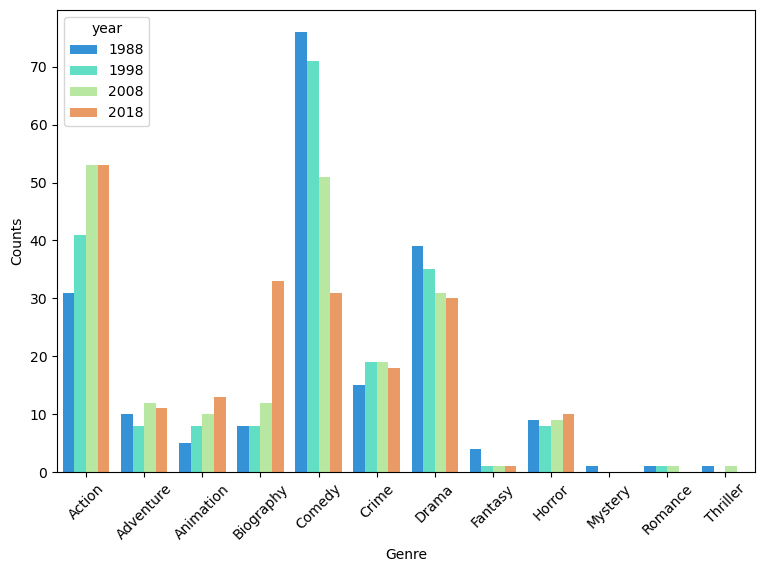

In [10]:
df_eights = df[df['year'].isin([1988, 1998, 2008, 2018])]
grouped = df_eights.groupby(['year', 'genre']).size().reset_index(name='counts')
pivot = grouped.pivot(index='year', columns='genre', values='counts')
melted = pivot.reset_index().melt(id_vars='year')

plt.figure(figsize=(9,6))
sb.barplot(x='genre', y='value', hue='year', palette='rainbow',data=melted)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

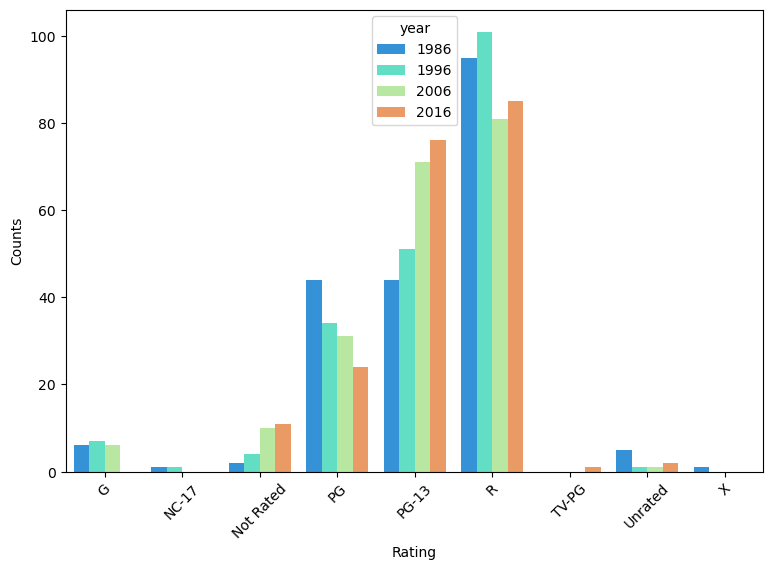

In [9]:
df_ratings = df[df['year'].isin([1986, 1996, 2006, 2016])]
grouped = df_ratings.groupby(['year', 'rating']).size().reset_index(name='counts')
pivot = grouped.pivot(index='year', columns='rating', values='counts')
melted = pivot.reset_index().melt(id_vars='year')


plt.figure(figsize=(9,6))
sb.barplot(x='rating', y='value', hue='year', palette='rainbow',data=melted)
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

*Left to add:* visualizations on country! this one is a little more difficult because the sheer amount of countries, so I haven't been able to complete it yet, but definitely something I'd like to include